In [1]:
# load modules
import numpy as np
import pandas as pd
from sktime.performance_metrics.forecasting import mean_absolute_error, MeanAbsoluteError
from sktime.forecasting.arima import AutoARIMA

from data_protection_functions import *
from data_processing_functions import *
from forecasting_functions import *

# nice time series plots
from sktime.utils.plotting import plot_series

***

### Import Data

In [2]:
# import weekly finance time series
# ignore header and skip the first row to use integers as column names
full_data = pd.read_csv("../../Data/Train/Clean/full_m3_monthly_micro_clean.csv", header=None, skiprows=1)

In [4]:
# convert to a list of series, potentially with different lengths
full_data = [x.dropna() for _, x in full_data.iterrows()]

In [5]:
# forecast horizon
h = 1

In [6]:
Y = [x.iloc[:-h] for x in full_data]
Test = [x.iloc[-h:] for x in full_data]

***

### Apply Data Protection

In [7]:
epsilons = [0.1]

In [8]:
eps = epsilons[0]
Y_protected = apply_data_protection(Y, epsilon=eps)

### Pre-process the data

In [9]:
Y_processed, Y_last_window, Y_last_window_trend, _, _ = pre_process(ts_data=Y,
                                                                    target_forecast_period=h,
                                                                    log=True)

Y_protected_processed, Y_protected_last_window, Y_protected_last_window_trend, _, _ = pre_process(ts_data=Y_protected,
                                                                                                  target_forecast_period=h,
                                                                                                  log=True)

In [10]:
forecaster = AutoARIMA(D=0, seasonal=True, sp=12, maxiter=10, suppress_warnings=True)

In [11]:
forecaster.fit(Y_processed[25])

AutoARIMA(D=0, maxiter=10, sp=12, suppress_warnings=True)

In [12]:
fitted = Y_processed[25] - forecaster.predict_residuals()

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

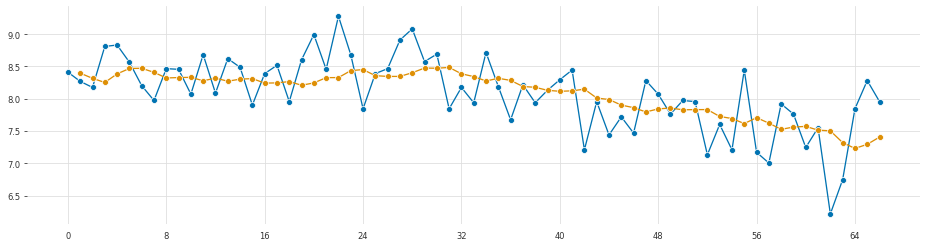

In [13]:
plot_series(Y_processed[25], fitted)

In [14]:
params = forecaster.get_fitted_params()

In [15]:
params

{'intercept': -0.01573874978588563,
 'ma.L1': -0.8705606923458553,
 'sigma2': 0.20692010948903358,
 'order': (0, 1, 1),
 'seasonal_order': (0, 0, 0, 12),
 'aic': 90.63603049133076,
 'aicc': 91.02312726552431,
 'bic': 97.20499471741003,
 'hqic': 93.23174047173828}

In [16]:
(p, d, q) = params['order']
(P, D, Q, m) = params['seasonal_order']

In [17]:
arima_params = {"p": [], "d": [], "q": [], "P": [], "D": [], "Q": [], "intercept": [], "eps": []}

In [18]:
arima_params["p"].append(p)
arima_params["d"].append(d)
arima_params["q"].append(q)
arima_params["P"].append(P)
arima_params["D"].append(D)
arima_params["Q"].append(Q)
arima_params["intercept"].append(int('intercept' in params))
arima_params["eps"].append(eps)

In [19]:
arima_params

{'p': [0],
 'd': [1],
 'q': [1],
 'P': [0],
 'D': [0],
 'Q': [0],
 'intercept': [1],
 'eps': [0.1]}

***

## Implementing the Above in for-loop over all epsilons

In [20]:
epsilons = [1]

In [21]:
# dictionary for tracking parameter values
arima_params = {"p": [], "d": [], "q": [], "P": [], "D": [], "Q": [], "intercept": [], "eps": []}

protected_fitted_values = {}

for eps in epsilons:
    
    # create protected dataset
    Y_protected = apply_data_protection(Y, epsilon=eps)
    
    # pre-process the protected data
    Y_protected_processed, Y_protected_last_window, Y_protected_last_window_trend, _, _ = pre_process(ts_data=Y_protected,
                                                                                                      target_forecast_period=h,
                                                                                                      log=True)
    
    for i, y in enumerate(Y_protected_processed):
        
        # ARIMA forecaster
        forecaster = AutoARIMA(seasonal=True, sp=12, maxiter=10, suppress_warnings=True)
    
        # fit ARIMA forecaster
        forecaster.fit(y)
        
        fitted = y - forecaster.predict_residuals()
        
        protected_fitted_values[str(eps)+"_"+str(i)] = fitted
        
        # extract parameters
        params = forecaster.get_fitted_params()
        
        (p, d, q) = params['order']
        (P, D, Q, m) = params['seasonal_order']
        
        arima_params["p"].append(p)
        arima_params["d"].append(d)
        arima_params["q"].append(q)
        arima_params["P"].append(P)
        arima_params["D"].append(D)
        arima_params["Q"].append(Q)
        arima_params["intercept"].append(int('intercept' in params))
        arima_params["eps"].append(eps)

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

In [22]:
protected_fitted_values = pd.DataFrame(protected_fitted_values)
protected_fitted_values.to_csv("../../Outputs/Tables/arima_fitted_vals_protected.csv", index=False)

In [23]:
fitted_values = {}

for i, y in enumerate(Y_processed):
    
    # ARIMA forecaster
    forecaster = AutoARIMA(seasonal=True, sp=12, maxiter=10, suppress_warnings=True)
    
    # fit ARIMA forecaster
    forecaster.fit(y)
    
    # calculate fitted values
    fitted = y - forecaster.predict_residuals()
    
    # store fitted values
    fitted_values[str(i)] = fitted
        
    # extract parameters
    params = forecaster.get_fitted_params()
        
    (p, d, q) = params['order']
    (P, D, Q, m) = params['seasonal_order']
        
    arima_params["p"].append(p)
    arima_params["d"].append(d)
    arima_params["q"].append(q)
    arima_params["P"].append(P)
    arima_params["D"].append(D)
    arima_params["Q"].append(Q)
    arima_params["intercept"].append(int('intercept' in params))
    arima_params["eps"].append(1000)

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\Cameron\anaconda3\lib\site-packages\pmdarima\arima\arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warn

In [24]:
fitted_values = pd.DataFrame(fitted_values)
fitted_values.to_csv("../../Outputs/Tables/arima_fitted_vals_original.csv", index=False)

In [25]:
arima_params = pd.DataFrame(arima_params)

In [26]:
arima_params.to_csv("../../Outputs/Tables/arima_params.csv", index=False)